<a href="https://colab.research.google.com/github/rajeevraghava/social/blob/main/sentiment_analysis_of_twitter_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the Library to the Model

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
from textblob import TextBlob




#Importing the Twitter dataset via external CSV file

In [ ]:
from google.colab import files
data=files.upload()

Saving twitter dataset.csv to twitter dataset.csv


#***Reading and storing the datasets into a variable.***

In [ ]:
df = pd.read_csv('twitter dataset.csv')

All the tweets are stored in X variable & Sentiment is Y ***variable*** ***bold text***


In [ ]:
X = df['tweet']
y = df['label']

#Cleaning of the ***data***

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return " ".join(words)

X = X.apply(preprocess_text)


tokenizer = RegexpTokenizer(r"\w+")
en_stopwords = set(stopwords.words('english'))
ps = PorterStemmer()





# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def getCleanedText(text):
  text = text.lower()

  # tokenizing
  tokens = tokenizer.tokenize(text)
  new_tokens = [token for token in tokens if token not in en_stopwords]
  stemmed_tokens = [ps.stem(tokens) for tokens in new_tokens]
  clean_text = " ".join(stemmed_tokens)
  return clean_text

In [ ]:
X_clean = [getCleanedText(i) for i in X_train]
xt_clean = [getCleanedText(i) for i in X_test]

# Vectorize the text data using CountVectorizer

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
cv = CountVectorizer(ngram_range = (1,2))

In [ ]:
X_vec = cv.fit_transform(X_clean).toarray()

In [ ]:
Xt_vect = cv.transform(xt_clean).toarray()

In [ ]:
Xt_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Using Multinomial Naive Bayes


In [ ]:
clf = MultinomialNB()
clf.fit(X_train, y_train)


MultinomialNB()

In [ ]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)


Accuracy: 0.96
Confusion Matrix:
[[5895   42]
 [ 237  219]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5937
           1       0.84      0.48      0.61       456

    accuracy                           0.96      6393
   macro avg       0.90      0.74      0.79      6393
weighted avg       0.95      0.96      0.95      6393



#Accuracy

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.96


#Predicting the statement

In [ ]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    sentiment = analysis.sentiment.polarity

    if sentiment > 0:
        return "Positive"
    elif sentiment == 0:
        return "Neutral"
    else:
        return "Negative"


In [ ]:

df['label'] = df['tweet'].apply(analyze_sentiment)


In [ ]:
def predict_sentiment(input_text):
    input_text = [input_text]  # Convert to a list
    input_text = vectorizer.transform(input_text)  # Vectorize the input text
    sentiment = clf.predict(input_text)[0]  # Predict sentiment
    if sentiment == 'Positive':
        return "good"
    else:
        return "bad"

In [ ]:
from wordcloud import WordCloud

# Create separate DataFrames for each sentiment (e.g., positive, neutral, negative)
positive_tweets = df[df['Sentiment'] == 'Positive']['Text']
neutral_tweets = df[df['Sentiment'] == 'Neutral']['Text']
negative_tweets = df[df['Sentiment'] == 'Negative']['Text']

# Create WordCloud for each sentiment
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

plot_wordcloud(positive_tweets, 'Positive Sentiment Word Cloud')
plot_wordcloud(neutral_tweets, 'Neutral Sentiment Word Cloud')
plot_wordcloud(negative_tweets, 'Negative Sentiment Word Cloud')

#Visualization of the dataset

Positive    15881
Neutral     11359
Negative     4722
Name: label, dtype: int64


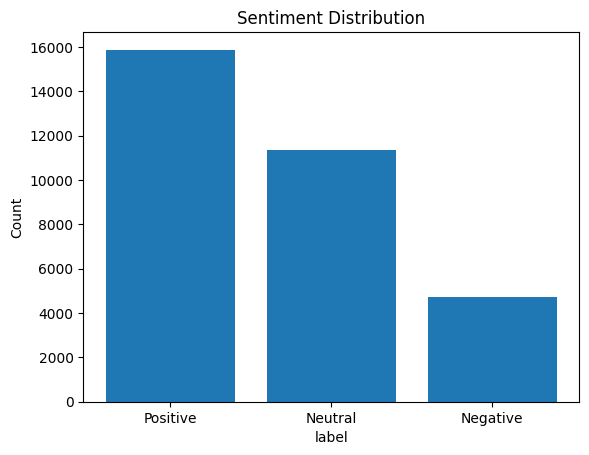

In [ ]:
sentiment_counts = df['label'].value_counts()
print(sentiment_counts)

# To visualize the sentiment distribution:
import matplotlib.pyplot as plt

plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('label')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()


#Final accuracy of the model is 96%

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the model is: {accuracy:.2f}')

Accuracy of the model is: 0.96


In [ ]:
user_input = input("Enter a text: S")
sentiment = predict_sentiment(user_input)
print("Predicted sentiment:", sentiment)

Enter a text: best
Predicted sentiment: bad
